# 作業目標
    了解 Padding 的作法
    
    了解 Pooling 的作法

# 作業重點
    1. 調整 Padding 的設定，看 Padding 後的結果
    
    2. 調整 Pooling 的設定，看 Pooling 後的結果

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# 繪圖結果直接顯示在 Jupyter cell 之內
%matplotlib inline  
plt.rcParams['figure.figsize'] = (5.0, 4.0) # 設定繪圖板的大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload：可以讓我們不退出 IPython 就動態修改代碼，在執行代碼前 IPython 會幫我們自動重載改動的模塊
%load_ext autoreload
%autoreload 2
np.random.seed(1)

In [2]:
# GRADED FUNCTION: zero_pad
def zero_pad(X, pad):
    """
    對 image X 做 zero-padding
    參數定義如下:
        X -- python numpy array，維度 (m, n_H, n_W, n_C)，代表一批 m 個圖像
             n_H：圖高
             n_W：圖寬
             n_C：channel 數
        pad -- 整數，加幾圈的 zero padding
    
    Returns:
        X_pad -- 做完 zero-padding 的結果，維度 (m, n_H + 2*pad, n_W + 2*pad, n_C) 
    """
    
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
  
    return X_pad

x.shape =
(4, 5, 5, 2)
x_pad.shape =
(4, 9, 9, 2)
x[1, 1] =
[[-0.75439794  1.25286816]
 [ 0.51292982 -0.29809284]
 [ 0.48851815 -0.07557171]
 [ 1.13162939  1.51981682]
 [ 2.18557541 -1.39649634]]
x_pad[1, 1] =
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


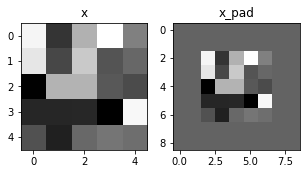

In [3]:
np.random.seed(1)

x = np.random.randn(4, 5, 5, 2) # 產生 gray image
x_pad = zero_pad(x, 2) # 加兩圈 Pad

print("x.shape =")
print(x.shape)
print("x_pad.shape =")
print(x_pad.shape)
print("x[1, 1] =")
print(x[1, 1])
print("x_pad[1, 1] =")
print(x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])
plt.show()

In [4]:
# GRADED FUNCTION: pool_forward
def pool_forward(A_prev, hparameters, mode="max"):
    """
    設計一個前行網路的池化層
    參數定義如下：
        A_prev -- 輸入的 numpy 陣列，維度 (m, n_H_prev, n_W_prev, n_C_prev)
        hparameter 超參數 -- "f" and "stride" 所形成的 python 字典
        mode -- 池化的模式："max" or "average"
    
    Returns:
        A -- 輸出的池化層，維度為 (m, n_H, n_W, n_C) 的 numpy 陣列
        cache -- 可以應用在 backward pass pooling layer 資料，包含 input and hparameter
    """

    # from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
 
    # from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]

    # 定義輸出的 dimension
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # 初始化輸出的 matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    for i in range(m):  # 訓練樣本的 for 迴圈
        for h in range(n_H):  # 輸出樣本的 for 迴圈，針對 vertical axis
            for w in range(n_W):  # 輸出樣本的 for 迴圈，針對 horizontal axis
                for c in range (n_C):  # 輸出樣本的 for 迴圈，針對 channel

                    # 找出特徵圖的寬度跟高度四個點
                    vert_start = h * stride
                    vert_end = h * stride+ f
                    horiz_start = w * stride
                    horiz_end = w * stride + f

                    # 定義第 i 個訓練示例
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end,c]

                    # 計算輸入 data 的池化結果，使用 if statement 去做分類
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

    
    # 儲存輸入的特徵圖跟所設定的超參數，可以用在 pool_backward()
    cache = (A_prev, hparameters)
    
    # 確認輸出的資料維度
    assert(A.shape == (m, n_H, n_W, n_C))
    return A, cache

In [5]:
np.random.seed(1)
A_prev = np.random.randn(1, 3, 3, 3)
hparameters = {"stride" : 2, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
print("mode: max")
print("A =")
print(A)
print()

A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode: average")
print("A =")
print(A)

mode: max
A =
[[[[1.62434536 1.46210794 1.13376944]]]]

mode: average
A =
[[[[-0.00510271  0.3329262  -0.93902043]]]]
